In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy import stats as st

df = pd.read_excel("data\Conjunto_datos_tarea2.xlsx")

print(df)

    Numero muestra  Inicial  Primer_cambio  Segundo_cambio
0                1       74             73              74
1                2       72             89              73
2                3       73             73              73
3                4       72             77              77
4                5       73             81              74
..             ...      ...            ...             ...
85              86       72             88              72
86              87       73             78              79
87              88       74             48              78
88              89       72             77              72
89              90       72             99              75

[90 rows x 4 columns]


In [16]:
data1 = df["Inicial"].to_numpy()
data2 = df["Primer_cambio"].to_numpy()
data3 = df["Segundo_cambio"].to_numpy()


# Media muestral

In [17]:
mean1 = np.mean(data1)
mean2 = np.mean(data2)
mean3 = np.mean(data3)

print("\nPromedio de configuración Inicial: ", mean1)
print("Promedio de configuración Primer_cambio: ", mean2)
print("Promedio de configuración Segundo_cambio: ", mean3)


Promedio de configuración Inicial:  72.83333333333333
Promedio de configuración Primer_cambio:  74.13333333333334
Promedio de configuración Segundo_cambio:  75.28888888888889


# Desviación estándar muestral
 La varianza muestral posee N grados de libertad (más adelante se usará como estimador la varianza muestral con N-1 grados de libertad por se un estimador insesgado de la varianza poblacional)
`numpy.var(a, axis=None, dtype=None, out=None, ddof=0, keepdims=<no value>, *, where=<no value>)`  
Calcula la varianza a lo largo de los ejes especificados.    

Paramátro ddof int, opcional  
“Delta grados de libertad”: el divisor usado en el calculo es N - ddof, donde N representa el número de elementos. Por defaulto ddof es cero.

In [18]:
var1 = np.var(data1, ddof = 0)
var2 = np.var(data2, ddof = 0)
var3 = np.var(data3, ddof = 0)

print("Varianza en configuracón Inicial: ", var1)
print("Varianza en configuración de Primer_cambio: ", var2)
print("Varianza en configuración de Segundo_cambio: ", var3)

Varianza en configuracón Inicial:  1.0722222222222222
Varianza en configuración de Primer_cambio:  85.20444444444443
Varianza en configuración de Segundo_cambio:  4.427654320987655


# Estimación de parámetro de desviación estándar utilizando el método de máxima verosimilitud (MLE)
### Distribuciones de cada una de las muestras.

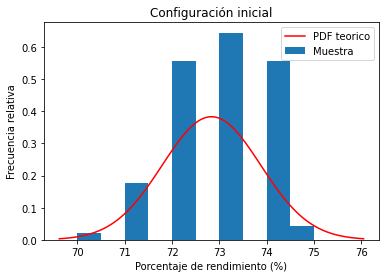

In [19]:
#MLE Configuracion inicial
Dist1 = st.norm(loc = mean1, scale = math.sqrt(np.var(data1, ddof = 1)))
x = np.linspace(Dist1.ppf(0.001),
                Dist1.ppf(0.999), 100)
plt.hist(data1, density = True, label = "Muestra")
plt.title("Configuración inicial")
plt.xlabel("Porcentaje de rendimiento (%)")
plt.ylabel("Frecuencia relativa")
plt.plot(x, Dist1.pdf(x), "r-", label="PDF teorico")
plt.legend()
plt.show()

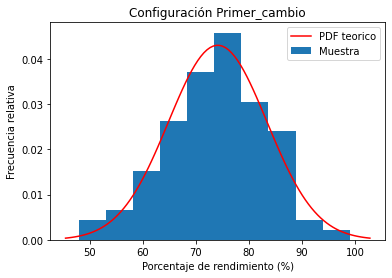

In [20]:
#MLE Primer_cambio
Dist2 = st.norm(loc = mean2, scale = math.sqrt(np.var(data2, ddof = 1)))
x = np.linspace(Dist2.ppf(0.001),
                Dist2.ppf(0.999), 100)
plt.hist(data2, density = True, label = "Muestra")
plt.title("Configuración Primer_cambio")
plt.xlabel("Porcentaje de rendimiento (%)")
plt.ylabel("Frecuencia relativa")
plt.plot(x, Dist2.pdf(x), "r-", label="PDF teorico")
plt.legend()
plt.show()

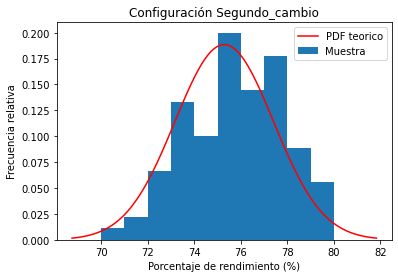

In [21]:
#MLE Segundo_cambio
Dist3 = st.norm(loc = mean3, scale = math.sqrt(np.var(data3, ddof = 1)))
x = np.linspace(Dist3.ppf(0.001),
                Dist3.ppf(0.999), 100)
plt.hist(data3, density = True, label = "Muestra")
plt.title("Configuración Segundo_cambio")
plt.xlabel("Porcentaje de rendimiento (%)")
plt.ylabel("Frecuencia relativa")
plt.plot(x, Dist3.pdf(x), "r-", label="PDF teorico")
plt.legend()
plt.show()

### MLE con método empírico
Se supone que todas las configuraciones general el comportamiento de una distribución normal. Además se supone que la media poblacional es conocida e igual a la media muestral.  
La función
`scipy.stats.norm(*args, **kwds) = <scipy.stats._continuous_distns.norm_gen object>`  
Es una variable aleatoria continua de una distribución normal.  
La palabra clave loc especifica la media. La palabra clave scale especifica la desviación estándar.  
Por otro lado, el método fit(data) estima parámetros para datos genéricos. El método hereda de `scipy.stats.rv_continuous.fit`  

`rv_continuous.fit(self, data, *args, **kwds)`  
El parámtro data se refiere al conjunto de datos disponible.
Retorna MLEs para parámetro de forma (si aplica), media, and desvación estándar a partir de los datos.  
Para cualquier argumento no provisto con estimaciones inicial, `self._fitstart(data)` es llamado para generarlo.  
Uno puede contener algunos parámtros fijos para valores específico. La palabra clave floc se usa para fijar la media (esto se usa porque la media poblacional será igual a la media muestral)  
El método devuelve una tubla con MLE para cualquier parámetro de forma (si corresponde), seguidos de la media y la desviación estándar (para el caso de la distribución normal, no se devuelven parámtros de forma así que es seguro que la desviación estándar es el segundo valor devuelto por el método).

In [22]:
print("\nEstimación MLE de la varianza y desviación estándar poblacional con método de cálculo empírico/práctico")

loc1, scale1 = st.norm.fit(data1, floc = mean1)
print("\nEstimación para la desvación estándar en la configuración Inicial: ", scale1)
print("Estimación Varianza para configuración Inicial: ", math.pow(scale1, 2))

loc2, scale2 = st.norm.fit(data2, floc = mean2)
print("\nEstimación de la desvación en la configuración Primer_cambio: ", scale2)
print("Estimación de la Varianza en la configuración Primer_cambio: ", math.pow(scale2, 2))

loc3, scale3 = st.norm.fit(data3, floc = mean3)
print("\nEstimación para desvación estándar en la configuración Segundo_cambio: ", scale3)
print("Estimación de Varianza para configuración Segundo_cambio: ", math.pow(scale3, 2))


Estimación MLE de la varianza y desviación estándar poblacional con método de cálculo empírico/práctico

Estimación para la desvación estándar en la configuración Inicial:  1.0354816378006044
Estimación Varianza para configuración Inicial:  1.0722222222222222

Estimación de la desvación en la configuración Primer_cambio:  9.230625355004094
Estimación de la Varianza en la configuración Primer_cambio:  85.20444444444445

Estimación para desvación estándar en la configuración Segundo_cambio:  2.104199211336145
Estimación de Varianza para configuración Segundo_cambio:  4.427654320987655


### MLE con método analítico
Se aproxima la estimación usando logaritmo natural.  
\begin{equation}
\frac{d\ln{\mathcal{L}\left(\sigma \right)}}{d\sigma} = \frac{\mathrm{d}  \ln\left (\prod_{i=1}^{n} \frac{1}{\sigma\sqrt{2{\pi}}} e^{-\frac{\left ( x_{i} - \mu  \right)^2}{2{\sigma^2}}}\right )}{\mathrm{d} \sigma }
\end{equation}

Si $\frac{d\ln{\mathcal{L}\left(\sigma \right)}}{d\sigma} = 0$, entonces

\begin{equation}
\frac{\mathrm{d} \ln\left [\left (\frac{1}{\sigma \sqrt{2\pi }} \right )^{n}e^{\sum_{i=1}^{n}-\frac{\left ( x_{i} - \mu  \right )^2}{2\sigma ^2}} \right ]}{\mathrm{d} \sigma } = 0
\end{equation}

\begin{equation}
\Rightarrow \frac{\mathrm{d} \left [n\ln \left ( \frac{1}{\sigma \sqrt{2\pi }} \right )+\sum_{i=1}^{n}-\frac{\left ( x_{i} - \mu  \right )^2}{2\sigma ^2}\right ]}{\mathrm{d} \sigma } = 0
\end{equation}

\begin{equation}
\Rightarrow -\frac{n}{\sigma }+\frac{1}{\sigma ^3} \left[ \sum_{i=1}^{n} \left ( x_{i} - \mu  \right )^2\right ]=0
\end{equation}

\begin{equation}
\Rightarrow \hat{\sigma}=\sqrt{\frac{1}{n}\sum_{i=1}^{n}\left ( x_{i} - \mu  \right )^2}
\end{equation}

La estimación de la varianza poblacional, evidentemente, sería $\hat{\sigma}^2$

In [23]:
# MLE analitico de deviacion estandard.
print("\nEstimación MLE de varianza y desviación estándar poblacional por método analítico/teórico")
std1MLE = np.std(data1)
std2MLE = np.std(data2)
std3MLE = np.std(data3)

print("\nEstimación de desviación estandar para configuración Inicial: ", std1MLE)
print("Estimación de varianza para configuración Inicial: ", math.pow(std1MLE, 2))

print("\nEstimación de desviación estandar para configuración Primer_cambio: ", std2MLE)
print("Estimación de varianza para configuración Primer_cambio: ", math.pow(std2MLE, 2))

print("\nEstimación de desviación estandar para configuración Segundo_cambio: ", std3MLE)
print("Estimación de varianza para configuración Segundo_cambio: ", math.pow(std3MLE, 2))


Estimación MLE de varianza y desviación estándar poblacional por método analítico/teórico

Estimación de desviación estandar para configuración Inicial:  1.0354816378006044
Estimación de varianza para configuración Inicial:  1.0722222222222222

Estimación de desviación estandar para configuración Primer_cambio:  9.230625355004094
Estimación de varianza para configuración Primer_cambio:  85.20444444444445

Estimación de desviación estandar para configuración Segundo_cambio:  2.104199211336145
Estimación de varianza para configuración Segundo_cambio:  4.427654320987655


# Estimación insesgada de la varianza
Teorema 2: Sean $X_{1}, X_{2}, . . . , X_{n}$ una muestra aleatoria de una distribución con media $\mu$ y varianza $\sigma^2$. Entonces el estimador\newline
\begin{equation}
    \hat{\sigma}^2 = S^2 = \sum_{i=1}^{n} \frac{\left(X_{i} - \mu\right)^2}{n - 1}
\end{equation}

In [24]:
print("\nEstimación insesgada de la varianza poblacional")
var1 = np.var(data1, ddof = 1)
var2 = np.var(data2, ddof = 1)
var3 = np.var(data3, ddof = 1)

print("Varianza en configuracón Inicial: ", var1)
print("Varianza en configuración de Primer_cambio: ", var2)
print("Varianza en configuración de Segundo_cambio: ", var3)


Estimación insesgada de la varianza poblacional
Varianza en configuracón Inicial:  1.0842696629213484
Varianza en configuración de Primer_cambio:  86.16179775280898
Varianza en configuración de Segundo_cambio:  4.477403245942572


# Comparación de varianzas.
Teorema: Se $X_{1},...,X_{m}$ una muestra aleatoria de distribución normal con varianza $ \sigma_{1}^{2} $, sea $Y_{1}, . . . , Y_{n}$ otra muestra aleatoria (independiente de las $X_{i}$) de una distribución normal con varianza $\sigma_{2}^{2}$, y sean $S_{1}^2$ y $S_{2}^{2}$ las dos varianzas muestrales. Entonces la variable aleatoria
\begin{equation*}
F = \frac{S_{1}^2/\sigma_{1}^{2}}{S_{2}^2/\sigma_{2}^{2}}
\end{equation*}
tiene una distribución F con $v_{1} = m - 1$ y $v_{2} = n - 1$ grados de libertad.  
  
Prueba F para igualdad de varianzas  
Hipótesis nula: $H_{0}: \sigma_{1}^2 = \sigma_{2}^2$  
Hipótesis alternativa: $H_{1}: \sigma_{1}^2 \neq \sigma_{2}^2$  
Valor estadístico de prueba: $f = \frac{S_{1}^2}{S_{2}^2}$  
  
Región de rechazo para una prueba de nivel $\alpha$  
$f \geqslant F_{\alpha/2,m-1,n-1} \lor f \leqslant F_{1-\alpha/2,m-1,n-1}$

`scipy.stats.f(*args, **kwds) = <scipy.stats._continuous_distns.f_gen object>`  
Una variable aleatoria continua F. F toma dfn y dfd como parámetros de forma, donde dfn son los grados de libertad del numerador y dfd son los grados de libertad del denominador.  
  
Por otro lado  
`rv_continuous.ppf(self, q, *args, **kwds)`
Función de punto porcentual. Recibe como parámetri q la probabilidad de la cola inferior. Retorna el cuantil correspondiente a la cola inferior de probabilidad q.

In [25]:
f1 = var1/var2
f2 = var1/var3
f3 = var2/var3

alpha = 0.05
fdistribution = st.f(dfn = len(data1)-1, dfd = len(data2)-1) #Sirva para toda comparación pues las muestra son de igual tamaño
f_critical1 = fdistribution.ppf(alpha/2)
f_critical2 = fdistribution.ppf(1 - alpha/2)

print("\n")
if ((f1 > f_critical1) or (f1 < f_critical2)):
    print("var1 no igual a var2")
else:
    print("var1 igual a var2")

if ((f2 > f_critical1) or (f2 < f_critical2)):
    print("var1 no igual a var3")
else:
    print("var1 igual a var2")

if ((f3 > f_critical1) or (f3 < f_critical2)):
    print("var2 no igual a var3")
else:
    print("var2 igual a var3")




var1 no igual a var2
var1 no igual a var3
var2 no igual a var3
